In [5]:
from scipy.misc import derivative
from scipy.integrate import simpson
from const import *
import ldfparser
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def cal_Vp(IV_df):
    V = np.array(IV_df['V'])
    I = np.array(IV_df['I'])
    dIdV = np.gradient(I, V)
    Vp = V[np.argmax(dIdV)]
    return Vp

def cal_eedf(IV_df):
    Vp = cal_Vp(IV_df)
    V = np.array(IV_df['V'])
    I = np.array(IV_df['I'])
    dIdV = np.gradient(I, V)
    dIdV2 = np.gradient(dIdV, V)
    eedf = 2*dIdV2/e/Ap*np.sqrt(2*Me*abs(V-Vp)/e)
    return eedf

In [3]:
workDir = './211216(SF6)/bias (float) 56mm B-field/'
parser = ldfparser.LDF(workDir)
ldf_files = parser.ldf_paths()
for file in ldf_files:
    IV, eedf, result = parser.pull_attr(file, need_return=True)
    Vp = cal_Vp(IV)
    eedf = cal_eedf(IV)
    print(file)
    

./211216(SF6)/bias (float) 56mm B-field/100.ldf
./211216(SF6)/bias (float) 56mm B-field/110.ldf
./211216(SF6)/bias (float) 56mm B-field/120.ldf
./211216(SF6)/bias (float) 56mm B-field/130.ldf
./211216(SF6)/bias (float) 56mm B-field/135.ldf
./211216(SF6)/bias (float) 56mm B-field/40.ldf
./211216(SF6)/bias (float) 56mm B-field/50.ldf
./211216(SF6)/bias (float) 56mm B-field/60.ldf
./211216(SF6)/bias (float) 56mm B-field/70.ldf
./211216(SF6)/bias (float) 56mm B-field/80.ldf
./211216(SF6)/bias (float) 56mm B-field/90.ldf


In [4]:
V = np.array(IV['V'])
I = np.array(IV['I'])

(0.0, 42.503495)

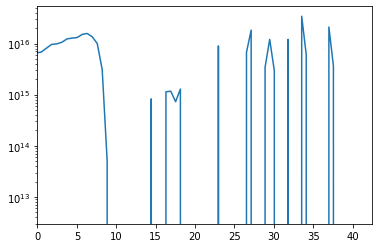

In [5]:
plt.plot(V+Vp, eedf)
plt.yscale('log')
plt.xlim(0,)

In [11]:
dIdV = np.gradient(I,V)
Vp = V[np.argmax(dIdV)]
Vsat = -V[0] # 양수로 바꿈
Isat = -I[0] # 양수로 바꿈

4.73516


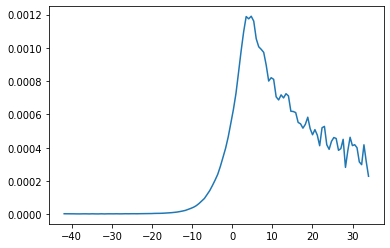

In [13]:
plt.plot(V,dIdV)
print(V[np.argmax(dIdV)])